Advanced Programming in Python Workshop – MiniProject #1

Due till 20/12/24

Part 1 – NumPy, Matplotlib/Seaborn:

Q1 (35pts): Convert covariance matrix into correlation matrix using numpy

A. Briefly explain in 1-2 sentences the concepts of Covariance and Correlation, and describe their relationship. You may use equations for clarification

B. Load the Iris dataset, using any method of your choice (e.g.: pd.read_csv("iris.csv") in Pandas).

Use visualization to explore the relationship between the different features.

C. Implement the following functions:

a. A function to calculate the covariance between two variables:\
def calcCov(x, y): <your implementation here>,

b. A function to compute the Covariance matrix:\
def covMat(data): <your implementation here>\
covMat(data) should return an n by n covariance matrix, where n is the number of features (in case of the iris dataset n=4)

D. Test1: compare the results of your function with NumPy's\
np.cov(data,rowvar=False) using the iris dataset.

E. Using your covariance function, implement a function to calculate the correlation
matrix:\
def corrMat(data):\
<should use covMat(data) and return the correlation matrix>

F. Test2: validate your correlation matrix implementation by comparing it with the
results of NumPy's np.corrcoef(data,rowvar=False), using the iris dataset.

G. Use visualizations to communicate the tests results. Include appropriate titles,
axis labels, and colorbars where relevant.

In [1]:
# importing the necessary packages

# for numerical computations
import numpy as np
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# for loading the dataset and handling the data
import pandas as pd
# for loading the iris dataset
from sklearn.datasets import load_iris
# for type hints
from typing import Union

= A =
Briefly explain in 1-2 sentences the concepts of Covariance and Correlation, and describe their relationship. You may use equations for clarification.

Suppose we have two independent random variables: $X$ and $Y$.\
Covariance of variables $X$ and $Y$ is defined as follows:

$$ Cov(X, Y) = \sum^{n}_{i=1} \frac{(X_i-\overline{X})(Y_i-\overline{Y})}{n-1}, $$

where $\overline{X}$ and $\overline{Y}$ are the means of $X$ and $Y$, respectively; $n$ is a total count of sample values. Here, Bessel's correction (the $n-1$ term) is applied to ensure that the bias due to finite sample size is reduced. Covariance quantifies how two variables change together. If $Cov(X, Y) > 0$, the variables tend to increase together; if $Cov(X, Y) < 0$, the relationship between the variables is inverse; if $Cov(X, Y) \approx 0$, there is little to no linear relationship between the variables $X$ and $Y$.

Correlation of variables $X$ and $Y$ is defined using Covarinace as follows:

$$
Corr(X, Y) = \frac{Cov(X, Y)}{\sigma_X\sigma_Y},
$$

where $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$, respectively. Correlation quantifies the strength and direction of the linear relationship between $X$ and $Y$ by normalizing covariance with their standard deviations. If $Corr(X, Y) = 1$, the variables are perfectly positively correlated, meaning there is a perfect linear relationship, and $Y$ increases proportionally as $X$ increases. $Corr(X, Y) = -1$, the variables are perfectly negatively correlated. This means there is a perfect linear relationship between $X$ and $Y$, but in opposite directions: as $X$ increases, $Y$ decreases proportionally, and vise versa. If $Corr(X, Y) = 0$, the variables are uncorrelated in the linear sense. However, they could still have a non-linear relationship or other forms of dependence.

In essence, correlation is the normalized form of covariance, ensuring the measure is scale-independent. Covariance indicates the direction of a relationship, while correlation standardizes it to quantify both the direction and strength of the linear association.

In [2]:
# B. Load the Iris dataset, using any method of your choice

# loading the iris dataset
iris = load_iris()
# converting the dataset to a pandas dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
# displaying the first 5 rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# C. Implement the following functions:
# a. A function to calculate the covariance between two variables:

# defining a function for calculating covariance
# according to the definition, we define n = len(x) for normalization;
# and define mean_x, mean_y as the mean of x and y
def calcCov(x: pd.Series, y: pd.Series) -> float:
    """
    Calculate the covariance between two variables.
    
    Parameters
    ----------
    x : pd.Series
        The first variable.
    y : pd.Series
        The second variable.
    
    Returns
    ----------
    float
        The covariance between the two variables.
    """
    # getting the number of observations (population size) for Bessel's correction
    n = len(x)
    # calculating the mean of x and y
    mean_x, mean_y = np.mean(x), np.mean(y)

    return np.sum((x - mean_x) * (y - mean_y)) / (n - 1)

In [107]:
# b. A function to compute the Covariance matrix:

# defining a function for computing the covariance matrix
def covMat(df: pd.DataFrame) -> np.ndarray:
    """
    Compute the covariance matrix.
    
    Parameters
    ----------
    df : pd.DataFrame
        The dataset.
    
    Returns
    ----------
    np.ndarray
        The covariance matrix.
    """
    # defining the size of the covariance matrix
    size = df.shape[1]
    # initiating a square-shaped covariance matrix filled with zeros
    cov_matrix = np.zeros((size, size))
    # updating each element of the covariance matrix with the covariance between the corresponding variables
    for i in range(size):
        for j in range(size):
            cov_matrix[i, j] = calcCov(df.iloc[:, i], df.iloc[:, j])
            
    return cov_matrix

In [ ]:
# D. Test1: compare the results of your function with NumPy's np.cov(data,rowvar=False) using the iris dataset.

# computing the covariance matrix using our function
covMatrix = covMat(iris_df.iloc[:, :-1])
# computing the covariance matrix using NumPy
covMatrix_np = np.cov(iris_df.iloc[:, :-1].values, rowvar=False) # iris_df.iloc[:, :-1].values

# compare both matrices element-wisely
if np.allclose(covMatrix, covMatrix_np, atol=1e-1):
    print('The results for the covariance matrix are valid within a tolerance of 1e-1.\n')
else:
    print('The results for the covariance matrix are not valid within a tolerance of 1e-1.\n')

# printing the results
print(f'Covariance matrix (my function):\n{covMatrix}\n')
print(f'Covariance matrix (NumPy):\n{covMatrix_np}')

The results for the covariance matrix are valid within a tolerance of 1e-1.

Covariance matrix (my function):
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

Covariance matrix (NumPy):
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [ ]:
# E. Using your covariance function, implement a function to calculate the correlation matrix:

# defining a function for calculating the correlation matrix
def corrMat(covMatrix: np.ndarray) -> np.ndarray:
    """
    Calculate the correlation matrix.
    
    Parameters
    ----------
    covMatrix : np.ndarray
        The covariance matrix.
    
    Returns
    ----------
    np.ndarray
        The correlation matrix.
    """
    # calculating the standard deviation by square rooting of the diagonal elements
    sigma = np.sqrt(np.diag(covMatrix))
    # calculating the correlation matrix by normalizing covariance with standard deviations
    corrMatrix = covMatrix / np.outer(sigma, sigma)
    # ensuring the diagonal elements are 1
    np.fill_diagonal(corrMatrix, 1.0)
    
    return corrMatrix

In [ ]:
# F. Test2: validate your correlation matrix implementation by comparing it with the results of NumPy's np.corrcoef(data,rowvar=False), using the iris dataset.

# computing the correlation matrix using our function
corrMatrix = corrMat(covMatrix)
# computing the correlation matrix using NumPy
corrMatrix_np = np.corrcoef(iris_df.iloc[:, :-1].values, rowvar=False)

# comparing both matrices element-wisely
if np.allclose(corrMatrix, corrMatrix_np, atol=1e-1):
    print('The results are valid within a tolerance of 1e-1.\n')
else:
    print('The results are not valid within a tolerance of 1e-1.\n')

# printing the results           
print(f'Correlation matrix (my function):\n{corrMatrix}\n')
print(f'Correlation matrix (NumPy):\n{corrMatrix_np}')

The results are valid within a tolerance of 1e-1.

Correlation matrix (my function):
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]

Correlation matrix (NumPy):
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [9]:
# G. Use visualizations to communicate the tests results. Include appropriate titles, axis labels, and colorbars where relevant.

# defining a list of titles for the plots
titles = ['Correlation matrix (my function)', 
          'Correlation matrix (NumPy)', 
          'Covariance matrix (my function)', 
          'Covariance matrix (NumPy)']

# defining a list of objects to plot
objects = [corrMatrix, corrMatrix_np, covMatrix, covMatrix_np]

# defining a function for visualizing the matrices
def plotMatrix(matrices: list[np.ndarray], 
               titles: list[str], 
               fig_size: tuple = (12, 10)) -> None:
    """
    Visualize the matrices.
    
    Parameters
    ----------
    matrices : list[np.ndarray]
        The matrices to plot.
    titles : list[str]
        The titles for the plots.
    fig_size : tuple, optional
        The size of the figure, by default (12, 10).
        """
    
    # creating a figure with 2 rows and 2 columns and setting the figure size
    fig, axs = plt.subplots(2, 2, figsize=fig_size)

    for i in range(len(matrices)):
        matrix = matrices[i]
        title = titles[i]

        # setting the parameters for the plot
        # determining extreme values for the colorbar
        if i in [0, 1]:
            vmin = np.round(np.min(np.concatenate((objects[0], objects[1]))), 2) # 
            vmax = np.round(np.max(np.concatenate((objects[0], objects[1]))), 2) # 
            #print(f'i={i},vmin: {vmin}, vmax: {vmax}')
        else:
            vmin = np.round(np.min(np.concatenate((objects[-1], objects[-2]))), 2) #
            vmax = np.round(np.max(np.concatenate((objects[-1], objects[-2]))), 2) #
            #print(f'i={i},vmin: {vmin}, vmax: {vmax}')

        sns.heatmap(matrix, 
                    vmin=vmin, 
                    vmax=vmax, 
                    annot=True, 
                    cmap='coolwarm', 
                    ax=axs[i // 2, i % 2])
        
        axs[i // 2, i % 2].set_title(title)

    plt.tight_layout()
    plt.show()

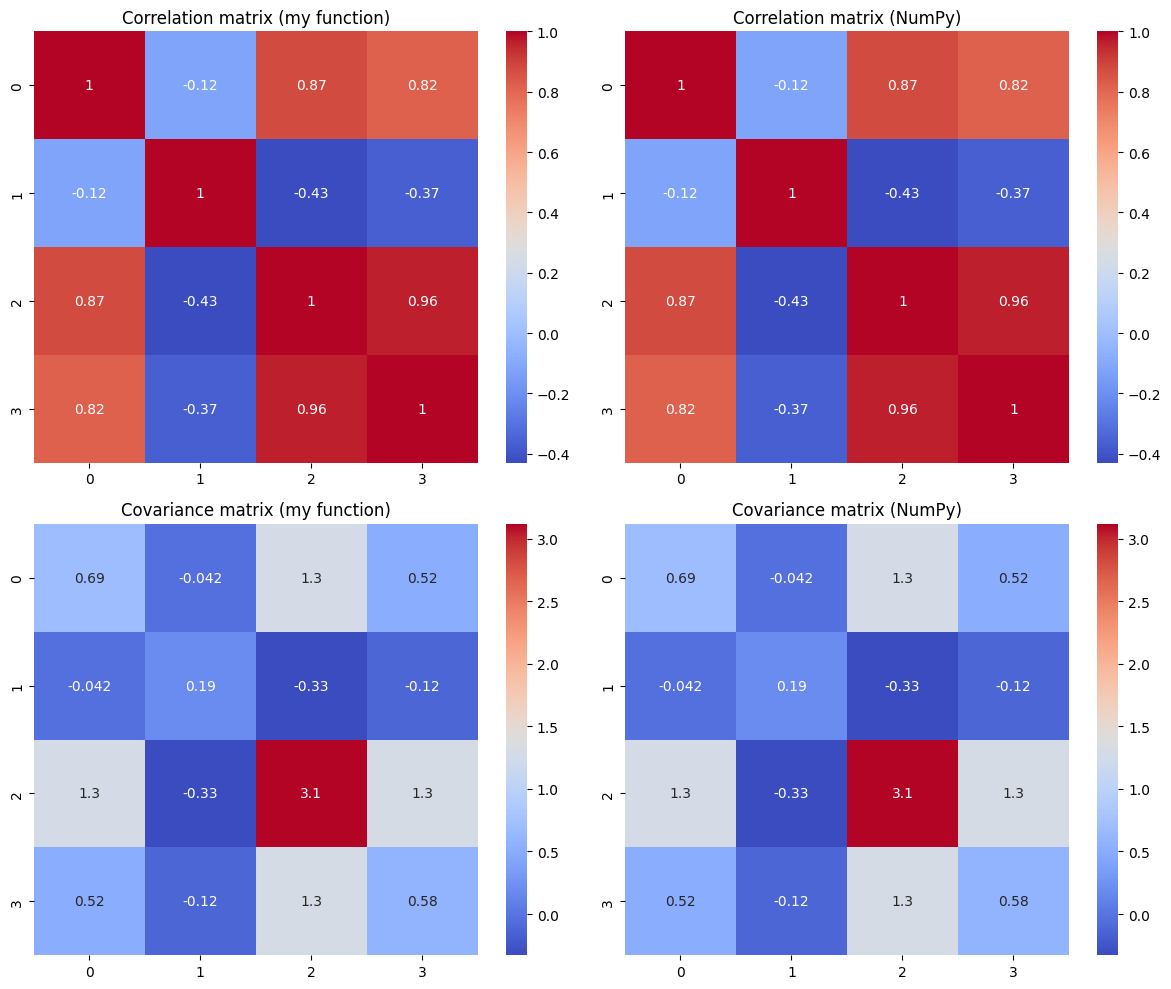

In [10]:
# visualising the results
plotMatrix(objects, titles)

Part 2 – NumPy, Pandas, MatPlotLib/Seaborn/Plotly:

The purpose of this part is to practice using libraries that were introduced in lecture. These
libraries include pandas, numpy and matplotlib/seaborn.

Please use the git commands that you were taught while completing this project and
upload this project to your github account.

When submitting the assignment, please include the code file as well as the URL to your git
account to show us you understand navigating projects using git.

Q2 (50pts): For this question you will use the dataset titled “laptop-price – dataset.csv”.

Import the libraries mentioned above and import the dataset from your filesystem into the
code.

Please write code to complete the following tasks with this dataset:\
• Plot the price of all the laptops\
• Which company has on average the most expensive laptop? What is the average laptop price for each company?\
• Find the different types of Operating systems present in the data - under the column name "OpSys".\
o Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform.

• Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.\
• What is the relationship between RAM and computer price? add an adequate plot to support your findings.\
• Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".\
o For example, in the first row in the column "Memory" it states "128GB SSD", the new column will have just "SSD" in its first row.

All plots must be plotted with axes titles and units as well as plot titles.


In [11]:
# downloading dataset laptop-price from kaggle using kagglehub
import kagglehub

# path to the dataset
path = kagglehub.dataset_download("muhammetvarl/laptop-price")

print("Path to dataset files:", path)

Path to dataset files: /home/user/.cache/kagglehub/datasets/muhammetvarl/laptop-price/versions/1


In [12]:
# loading the dataset as a pandas dataframe
# the encoding is set to latin-1 to avoid errors
df = pd.read_csv(path + '/laptop_price.csv', encoding='latin-1')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [13]:
# defining a few variable for commonly used parameters (labels)
price_label = 'Price (EUR)'
laptop_label = 'Laptop ID'
company_label = 'Company'
resolution_label = 'Resolution'
screen_size_label = 'Screen size (inches)'
frequency_label = 'Frequency'
ram_label = 'RAM (GB)'

In [ ]:
# defining a general function for generating plots
def visualize_data(plot_type: str, 
                data: Union[pd.DataFrame, pd.Series], 
                x: str = None, 
                y: str = None,
                order: list = None,
                hue: str = None,
                kde: bool = None, 
                title: str = None, 
                x_label: str = None, 
                y_label: str= None,
                ax: plt.Axes = None,
                xy_limits: list = None,
                color: str = None,
                linewidth: float = None,
                scatter_params: dict = None,
                legend_params: dict = None,
                isCreateFigure: bool = True,
                fig_size: tuple = None) -> None:
    '''
    A general function for creating plots

    Parameters
    ----------
    plot_type : str
        The type of plot. Can be either 'boxplot' or 'histplot' 'countplot'.
    df : Union[pd.DataFrame, pd.Series]
        The DataFrame or Series to plot.
    x : str
        The column to plot on the x-axis.
    y : str 
        The column to plot on the y-axis.
    order : list
        The order of the categories to plot.
    hue : str, optional
        The column to use for hue, by default None.
    kde : bool, optional
        Whether to plot a kernel density estimate, by default None.    
    title : str, optional
        The title of the plot, by default None.
    x_label : str, optional
        The label for the x-axis, by default None.
    y_label : str, optional
        The label for the y-axis, by default None.
    ax : plt.Axes, optional
        The axes to plot on, by default None.
    xy_limits : list, optional
        The limits of the plot, by default None.
    color : str, optional
        The color of the plot, by default None.
    linewidth : float, optional
        The linewidth of the plot, by default None.
    scatter_params : dict, optional
        The parameters for the scatter plot, by default None.    
    legend_params : dict, optional
        The parameters for the legend, by default None.
    isCreateFigure : bool, optional
        Whether to create a new figure, by default True.         
    fig_size : tuple, optional
        The size of the figure, by default None.
    '''

    scatter_params = scatter_params or {}  # defaulting to an empty dictionary if None
    legend_params = legend_params or {}    # defaulting to an empty dictionary if None

    if isCreateFigure:
        fig, ax = plt.subplots(figsize=fig_size)

    if plot_type == 'boxplot':
        sns.boxplot(data=data.sort_values(x, ascending=False), 
                    y=y, 
                    x=x, 
                    order=order,
                    hue=hue,
                    color=color,
                    linewidth=linewidth,
                    flierprops = dict(marker = 'o', 
                                      markeredgecolor = 'lightgrey', 
                                      markersize = 3.5, 
                                      linestyle = 'none', 
                                      markerfacecolor = color, 
                                      alpha = 0.9),
                    ax=ax)
    elif plot_type == 'histplot':
        sns.histplot(data=data, 
                     x=x, 
                     hue=hue, 
                     kde=kde, 
                     ax=ax) 
    elif plot_type == 'scatterplot':
        sns.scatterplot(data=data, 
                        x=x, 
                        y=y, 
                        hue=hue,
                        **scatter_params,
                        ax=ax)
        if legend_params is not None: 
            plt.legend(**legend_params)
    else:
        raise ValueError(f"Invalid plot type: {plot_type}, expected 'boxplot', 'histplot' or 'scatterplot'")  
      
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if xy_limits is not None:
        ax.set_xlim(xy_limits[0], xy_limits[1])
        ax.set_ylim(xy_limits[2], xy_limits[3])

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)

    if isCreateFigure:
        plt.tight_layout()
        plt.show()

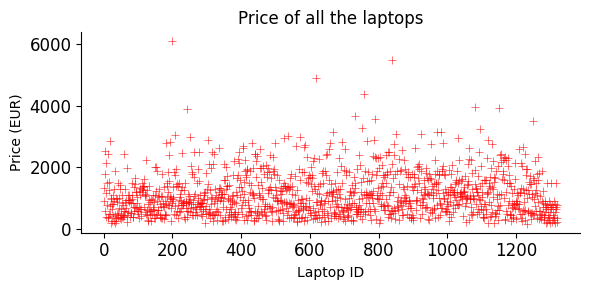

In [55]:
# let's plot the price of all the laptops

visualize_data('scatterplot', 
               data=df,
               x = 'laptop_ID',
               y = 'Price_euros',
               title='Price of all the laptops', 
               scatter_params={'alpha': 0.8, 'marker': '+', 'color': 'red'},
               x_label=laptop_label, 
               y_label=price_label,
               fig_size=(6, 3))

In [39]:
# let's find out which company has on average the most expensive laptop

# first, let's see what the average laptop price for each company is
# to do so, let's group the dataframe by company and calculate the mean price
avrg_price = df.groupby('Company')['Price_euros'].mean()
avrg_price.sort_values(ascending=False)

Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1186.068990
Xiaomi       1133.462500
Asus         1104.169367
Lenovo       1086.384444
HP           1067.774854
Fujitsu       729.000000
Acer          626.775825
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price_euros, dtype: float64

In [40]:
# now we can get the company with the highest average price

# to do so, let's use the idxmax() method 
# to return the label of the company with the highest average price
company_with_highest_price = avrg_price.idxmax()
company_with_highest_price

'Razer'

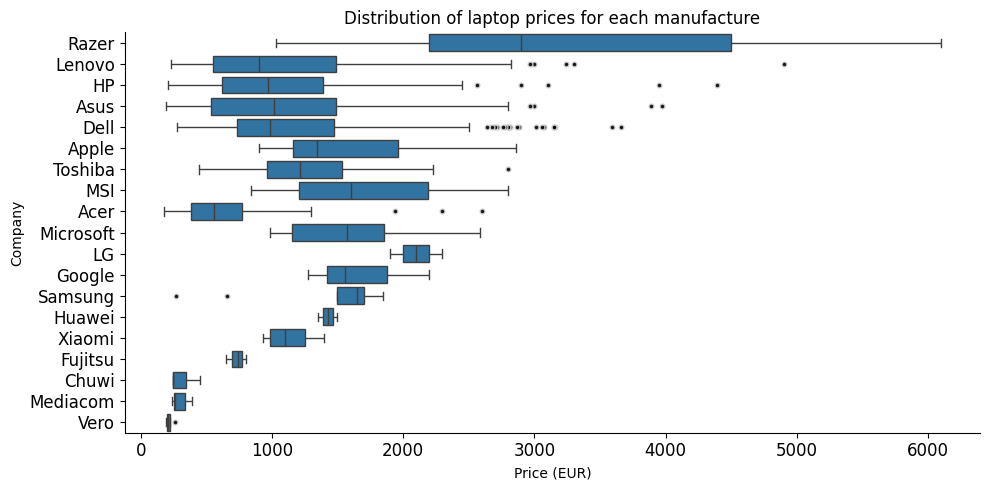

In [56]:
# BONUS: let's plot the distribution of the laptops prices for each manufacture

visualize_data('boxplot', 
               df, 
               x='Price_euros', 
               y='Company', 
               title='Distribution of laptop prices for each manufacture', 
               x_label=price_label, 
               y_label=company_label,
               fig_size=(10, 5))


In [43]:
# Find the different types of Operating systems present in the data - under the column name "OpSys".\
# Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform.

# let's get the unique entries of the operating systems
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [ ]:
# so we see that there are some operating systems that are the same systems 
# and just written differently or represent different versions in the column 
# let's fix them to be uniform

# doing this for macOS
df['OpSys'] = df['OpSys'].replace(['macOS', 'Mac OS X'], 'MacOS')
# doing this for Windows
df['OpSys'] = df['OpSys'].replace(['Windows 10 S', 'Windows 7', 'Windows 10'], 'Windows')

# checking if it worked
df['OpSys'].unique()

array(['MacOS', 'No OS', 'Windows', 'Linux', 'Android', 'Chrome OS'],
      dtype=object)

In [45]:
# Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems

# first, let's get the unique operating systems and store them in a variable
operating_systems = df['OpSys'].unique()
operating_systems.sort()
operating_systems

array(['Android', 'Chrome OS', 'Linux', 'MacOS', 'No OS', 'Windows'],
      dtype=object)

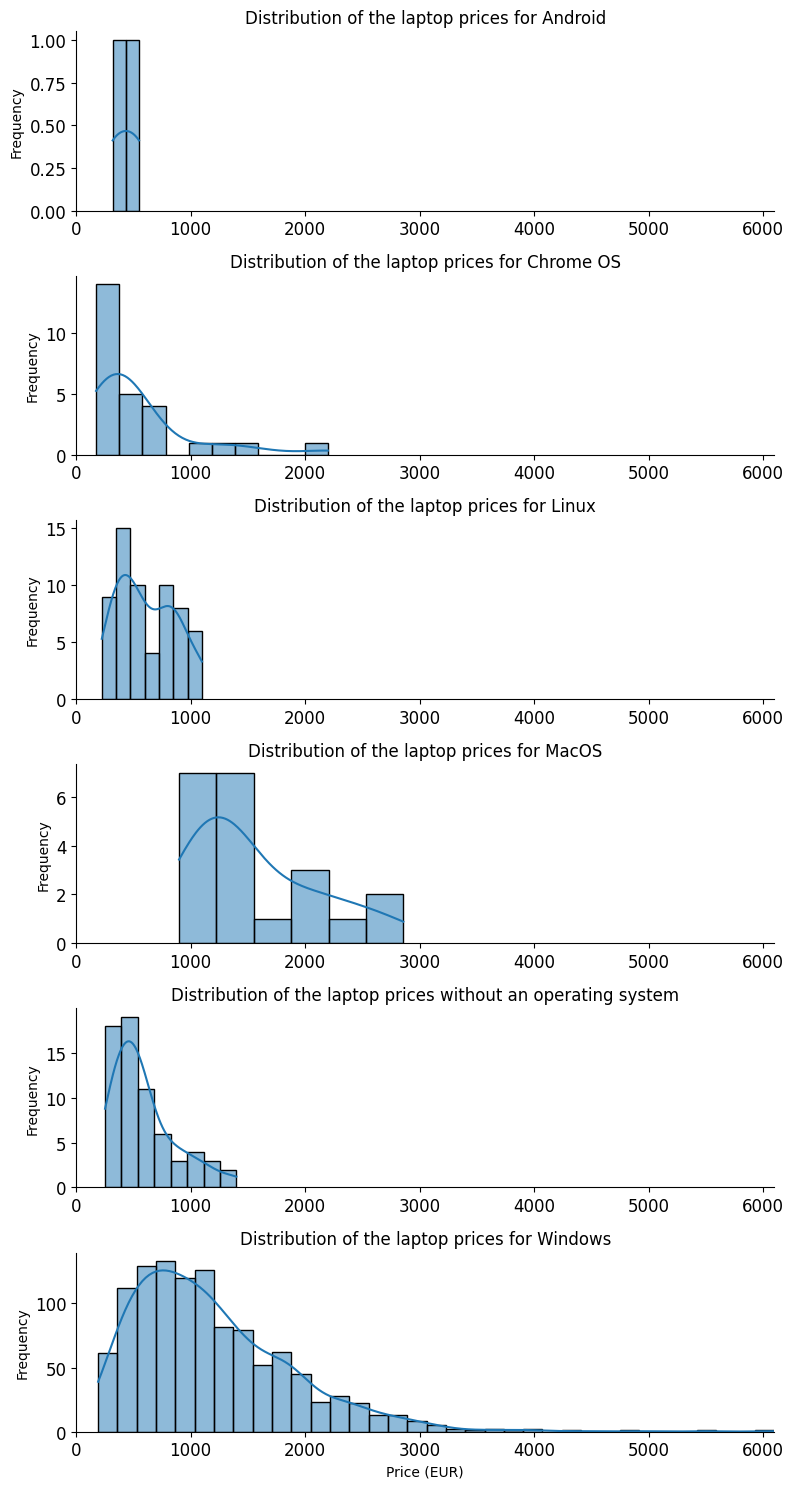

In [57]:
# now let's plot the distribution of the prices for each operating system

fig, axs = plt.subplots(len(operating_systems), figsize=(8, 15))

for n, os in enumerate(operating_systems):

    if n == len(operating_systems) - 1:
        x_label = price_label
    else:
        x_label = ''

    if os == 'No OS':
        title ='Distribution of the laptop prices without an operating system'
    else:    
        title = f'Distribution of the laptop prices for {os}'

    visualize_data('histplot', 
               data=df[df['OpSys'] == os]['Price_euros'], 
               kde=True,
               title=title, 
               x_label=x_label, 
               y_label=frequency_label,
               isCreateFigure=False,
               ax=axs[n],
               xy_limits=[0, max(df['Price_euros']), None, None])
fig.tight_layout()
plt.show()

In [58]:
# What is the relationship between RAM and computer price? add an adequate plot to support your findings

# let's also use seaborn for that
# let's sort the dataframe by RAM
# let's do it without modifying the original Ram column
# instead, we will create a helping column called Ram_numeric 
# which will contain the numeric part of the Ram column

# extracting a numeric part from the Ram column and storing them in the helper column as integers 
df['Ram_numeric'] = df['Ram'].str.extract(r'(\d+)').astype(int)
df = df.sort_values(by='Ram_numeric', ascending=True).drop(columns='Ram_numeric')

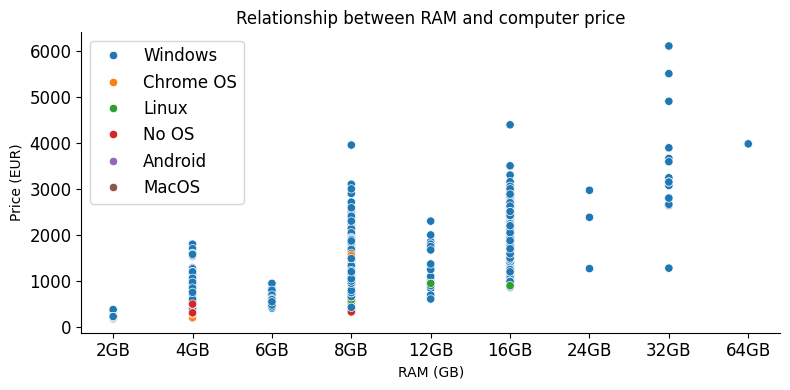

In [66]:
# discussion
# as we can see, there is a clear relationship between RAM and computer price
# in general, the more RAM, the higher the price
# there's one outlier; there could be some reason for it

visualize_data('scatterplot', 
               data=df,
               x='Ram',
               y='Price_euros',
               hue='OpSys',
               title='Relationship between RAM and computer price',
               x_label=ram_label,
               y_label=price_label,
               legend_params={'loc': 'upper left', 'fontsize': 'large'},
               isCreateFigure=True,
               fig_size=(8, 4))

In [67]:
# Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".
# For example, in the first row in the column "Memory" it states "128GB SSD", the new column will have just "SSD" in its first row.

# as we can see the Memory column also contains mixed storage types
df['Memory'].unique()

array(['32GB Flash Storage', '500GB HDD', '16GB SSD', '32GB SSD',
       '64GB Flash Storage', '1TB HDD', '256GB SSD', '1TB HDD +  1TB HDD',
       '128GB SSD', '180GB SSD', '16GB Flash Storage', '32GB HDD',
       '128GB Flash Storage', '128GB SSD +  1TB HDD', '1.0TB Hybrid',
       '64GB SSD', '256GB Flash Storage', '508GB Hybrid', '2TB HDD',
       '8GB SSD', '512GB SSD', '512GB SSD +  512GB SSD',
       '512GB Flash Storage', '240GB SSD', '256GB SSD +  500GB HDD',
       '128GB HDD', '128GB SSD +  2TB HDD', '256GB SSD +  1TB HDD',
       '64GB Flash Storage +  1TB HDD', '1.0TB HDD', '1TB SSD',
       '256GB SSD +  256GB SSD', '256GB SSD +  2TB HDD',
       '512GB SSD +  2TB HDD', '512GB SSD +  1TB HDD',
       '512GB SSD +  256GB SSD', '256GB SSD +  1.0TB Hybrid',
       '1TB SSD +  1TB HDD', '512GB SSD +  1.0TB Hybrid'], dtype=object)

In [ ]:
# if we want to catch mixed storage types, 
# it's better to define a function which will process each element of the Memory column

# defining a function to extract the storage type
def extract_storage_type(each_memory_element: str) -> str:
    """
    Function to extract the storage type from the Memory column

    Parameters:
    ----------
    each_memory_element : str
        The element of the Memory column
    Returns:
    ----------
    str
        The storage type
    """
    
    # initialize an empty list
    storage_parts = []
    # let's do splitting by '+', then strip spaces
    storage_parts = [part.strip() for part in each_memory_element.split('+')]
    
    # create a set to avoid adding the stripped spaces
    storage_types = set()

    # extracting the full storage type (last one or two words to catch mixed storage types)
    for part in storage_parts:
        words = part.split()
        # checking if the last two words belong to 'Flash' or 'Hybrid'
        if len(words) > 1 and words[-2] in ['Flash', 'Hybrid']:
            storage_types.add(' '.join(words[-2:]))
        else:
            # otherwise, taking the last word as HDD or SSD
            storage_types.add(words[-1])
    
    # returning a label for either mixed or single type
    if len(storage_types) > 1:
        return ' + '.join(sorted(storage_types))
    elif len(storage_types) == 1:
        return list(storage_types)[0]

In [ ]:
# applying the function to create the correct Storage type column
df['Storage type'] = df['Memory'].apply(extract_storage_type)

# let's check the unique values to make sure it works
print(df['Storage type'].unique())

['Flash Storage' 'HDD' 'SSD' 'HDD + SSD' 'Hybrid' 'Flash Storage + HDD'
 'Hybrid + SSD']


Q3 (15pts): Think of additional questions related to this data. What types of analyses and
visualizations would you use to address them? Select two questions from your list and
implement. Submit your list of questions, suggested analyses and visualizations and the
implementation.

In [ ]:
# we could go deeper and analyze what aspects of the laptop determine its price more/less

# 1. Check the relationship between the screen size and the price
# 2. Check the relationship between the screen resolution and the price

# 3. Check the relationship between other laptop features and its price

# 4. We could create a laptop parameters grid which would specify the best set of laptop parameters at a given price
# 5. Assuming the data reflects the real market, we could also determine the best configuration for a given budget

# 6. We could create a machine learning model which would predict the price of a new laptop based on its parameters
# 7. We could also determine which features are the most important in predicting the price

# To address questions 1-3, we could use an exploratory data analysis, such as a scatter plot or a box plot
# To address questions 4-7, we could use a machine learning technique, such as linear regression or random forest

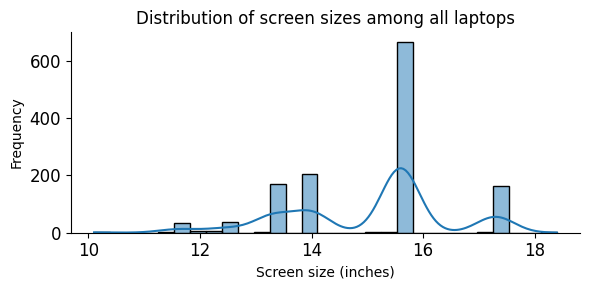

In [71]:
# for example, let's focus on the question 1:
# distribution of the prices by the screen size

# let's the plot the distribution of screen sizes among all laptops
visualize_data('histplot', 
               df['Inches'], 
               kde=True,
               title='Distribution of screen sizes among all laptops',
               x_label=screen_size_label, 
               y_label=frequency_label,
               fig_size=(6, 3))

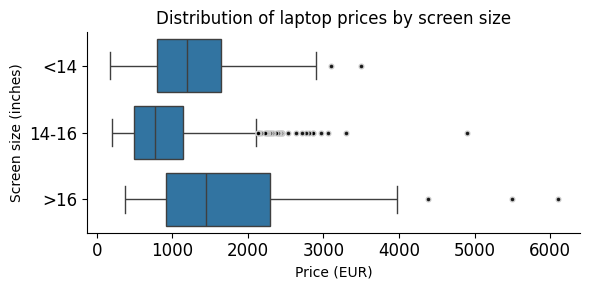

In [ ]:
# according to the distribution, it would make sense to create 3 bins: [:14], [14:16], [16:]
labels = ['<14', '14-16', '>16']
# creating the Series object with the binned values
binned_inches = pd.cut(df['Inches'], bins=[min(df['Inches']), 14, 16, max(df['Inches'])], labels=labels)
binned_inches.sort_index(inplace=True)
# sorting the Price column to just to make sure everything is ok
prices_sorted = df['Price_euros'].sort_index()
# creating the DataFrame with the binned values
prices_vs_inches = pd.concat([binned_inches, prices_sorted], axis=1)

# let's plot the distribution of laptop prices by the screen size
visualize_data('boxplot', 
               prices_vs_inches, 
               y='Inches', 
               x='Price_euros', 
               title='Distribution of laptop prices by screen size',
               x_label=price_label, 
               y_label=screen_size_label,
               fig_size=(6, 3))

In [73]:
# now, let's focus on the question 2:
# distribution of the prices by the screen resolution

# let's see how many unique values are in the ScreenResolution column
df['ScreenResolution'].unique()

array(['1366x768', 'Full HD 1920x1080', 'Touchscreen 1366x768',
       'Full HD / Touchscreen 1920x1080', 'IPS Panel Full HD 1920x1080',
       '1920x1080', '1600x900', 'IPS Panel 1366x768',
       'IPS Panel Full HD 1920x1200', 'Touchscreen 2256x1504',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Touchscreen 1920x1200',
       'IPS Panel Touchscreen 1366x768',
       'IPS Panel Touchscreen 2400x1600', 'Quad HD+ 3200x1800',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2560x1440',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel Full HD 2160x1440',
       'IPS Panel Retina Display 2560x1600',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Touchscreen 2560x1440',
       'Touchscreen / Full HD 1920x1080',
       '4K Ultra HD / Touchscreen 3840x2160', '4K Ultra HD 3840x2160',
       '2560x1440', 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
       'Touchscreen / 4K Ultra HD

In [ ]:
# to plot the distribution of laptop prices by the screen resolution,
# let's create a column for the screen resolution which will contain extracted values of resolution

# in order to extract the resolution from the ScreenResolution column, let's create a function
# which will process each element of the ScreenResolution column

# defining a function; it should split by space and take the last element
def extract_resolution(each_resolution_element: str) -> str:
    """
    Function to extract the resolution from the ScreenResolution column

    Parameters:
    ----------
    each_resolution_element : str
        The element of the ScreenResolution column
    Returns:
    ----------
    str
        The resolution
    """
    
    # initialize an empty list
    resolution_parts = []
    # let's do splitting by space, then strip spaces
    resolution_parts = [part.strip() for part in each_resolution_element.split(' ')]
    # returning a the last element containing the resolution
    return list(resolution_parts)[-1]

In [104]:
# applying the function to create the correct Resolution column
df['Resolution'] = df['ScreenResolution'].apply(extract_resolution)

# let's check the unique values to make sure it works
print(df['Resolution'].sort_values().unique())

# let's establish the order of the unique values
# because seaborn (boxplot) does not respect the order of the DataFrame by default; 
# instead, it internally determines the category order for the y (categorical) axis
resolution_order = df['Resolution'].sort_values(ascending=False).unique()

['1366x768' '1440x900' '1600x900' '1920x1080' '1920x1200' '2160x1440'
 '2256x1504' '2304x1440' '2400x1600' '2560x1440' '2560x1600' '2736x1824'
 '2880x1800' '3200x1800' '3840x2160']


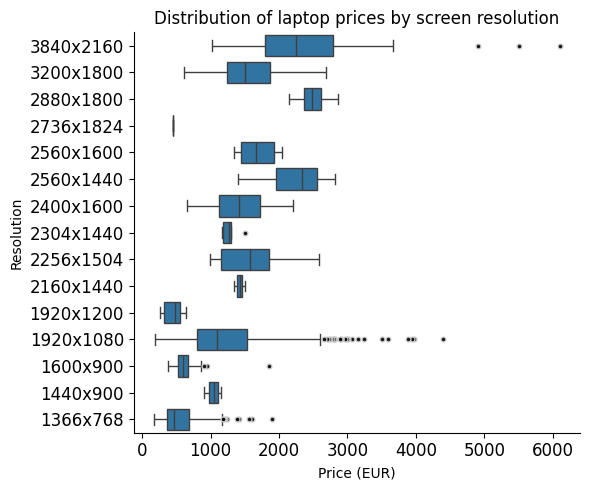

In [105]:
# now let's finally visualize the distribution of laptop prices by the screen resolution

visualize_data('boxplot', 
               df,#.sort_values(by='Width', ascending=False),
               #data=df.sort_values(by='Resolution', ascending=False, axis=0), 
               y='Resolution', 
               x='Price_euros',
               order = resolution_order,
               title='Distribution of laptop prices by screen resolution',
               x_label=price_label, 
               y_label=resolution_label,
               fig_size=(6, 5))